# 1. Libraries and Importing Dataset

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have correctly set up your GPU environment.")

In [1]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 
from pickle import dump

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.decomposition import PCA

In [13]:
path = "./Dataset/"

original = pd.read_csv(path+"train.csv")  

# original data -> original
# drop 'PRODUCT_ID' -> data 
data = original.drop(['PRODUCT_ID'], axis=1)
original

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,TRAIN_0000,1,0.531957,T100304,T_31,2.0,95.0,0.0,45.0,10.0,...,0.000008,0.000003,0.191408,0.000008,0.001210,0.000021,0.000003,0.000002,0.189,0.000006
1,TRAIN_0001,1,0.531105,T100306,T_31,2.0,96.0,0.0,45.0,10.0,...,0.000008,0.000003,0.188993,0.000032,0.000644,0.000041,0.000002,0.000003,0.185,0.000029
2,TRAIN_0002,1,0.532292,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_0003,1,0.528141,T100306,T_31,2.0,87.0,0.0,45.0,10.0,...,0.000007,0.000003,0.189424,0.000034,0.000678,0.000043,0.000004,0.000003,0.188,0.000031
4,TRAIN_0004,1,0.532289,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,TRAIN_1127,0,0.516681,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,TRAIN_1128,1,0.530413,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,TRAIN_1129,1,0.533311,T100306,T_31,1.0,88.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,TRAIN_1130,0,0.513135,T010306,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Basic Information

1,132 rows × 3,331 columns

- **Identification variable (1)**
    - PRODUCT_ID: 제품 고유의 ID 
- **Categorical variable (2)**
    - LINE: 제품이 들어간 공정 LINE 종류 (6)
        - 'T100306', 'T100304', T050304', 'T010306', 'T010305', 'T050307'
        - 434, 404, 86, 76, 66, 66
    - PRODUCT_CODE: 제품의 CODE 번호 (3) 
        - 'T_31', 'A_31', 'O_31'
        - 830, 294, 8
- **Numerical variable (2)**
    - Y_Quality: 제품 품질 관련 정량적 수치 
    - X(1~3326): 공정 과정에서 추출되어 비식별화된 변수
- **Y variable (1)**
    - Y_Class: 제품 품질 상태 
        - multi-class classification 
        - 0: 적정 기준 미달 (부적합) 1: 적정 2: 적정 기준 초과 (부적합)
        - 1:766 
        - 0:165, 2:201 (total 366)

추가적으로 확인한 것 
- null
- histogram distribution for categorical variables 
- the count of elements for each categorical variables 
- the description ot fhe numerical variables 

In [52]:
# Checking basic information
data.LINE.value_counts()

T100306    434
T100304    404
T050304     86
T010306     76
T010305     66
T050307     66
Name: LINE, dtype: int64

In [39]:
# Dividing the data into categorical and numerical variables
num_data = data.iloc[:, 4:]
cat_data = data.iloc[:, 0:4].drop(['Y_Quality'], axis=1)

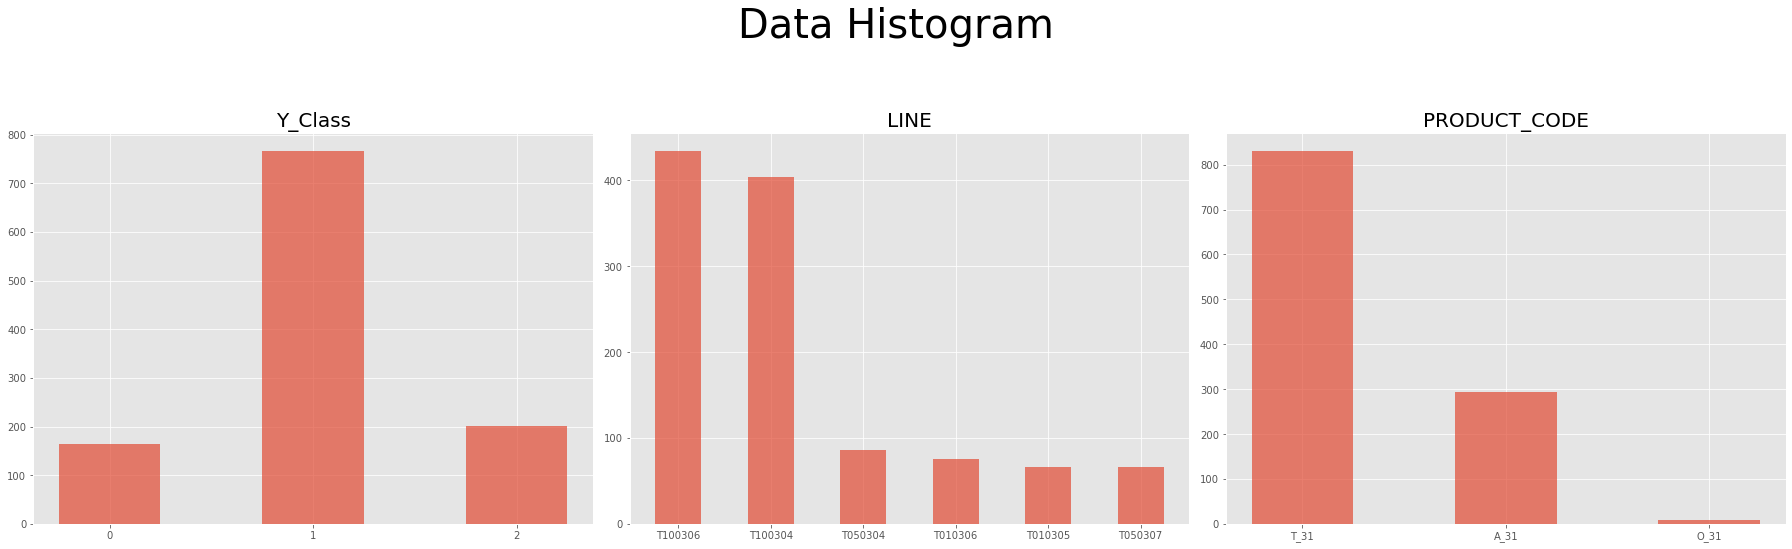

In [41]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = ['Y_Class', 'LINE', 'PRODUCT_CODE']
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(cat_data[cols[i]].unique()) > 20:
        plt.hist(cat_data[cols[i]], color='b', alpha=0.7)
    else:
        temp = cat_data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<AxesSubplot:>

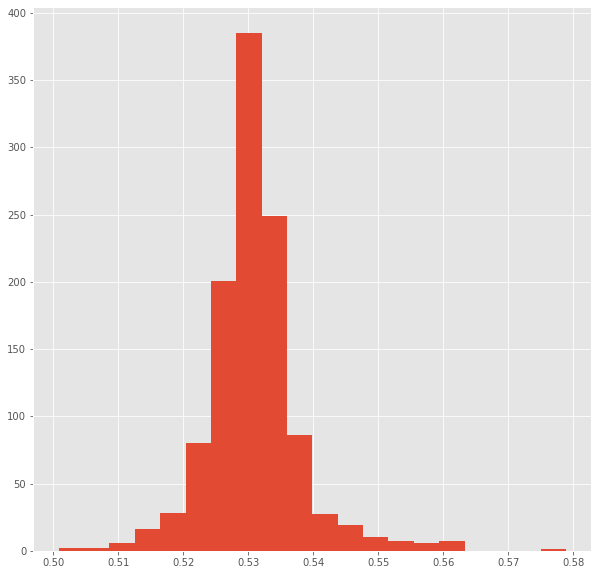

In [43]:
data['Y_Quality'].hist(bins= 20, figsize =(10,10))

In [51]:
data['Y_Quality'].describe()

count    1132.000000
mean        0.530789
std         0.007106
min         0.500856
25%         0.527369
50%         0.530527
75%         0.533478
max         0.578841
Name: Y_Quality, dtype: float64

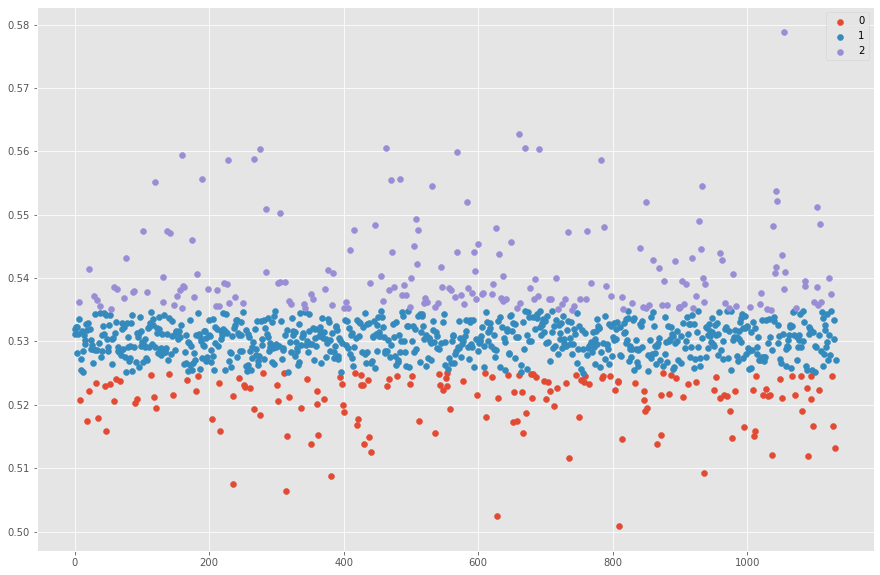

In [166]:
fig, ax = plt.subplots(figsize=(15,10))

for name, group in data[['Y_Class', 'Y_Quality']].groupby('Y_Class'):
    ax.scatter(group.index, group.Y_Quality, label=name)
plt.legend()

In [50]:
cat_data.isna().sum()

Y_Class         0
LINE            0
PRODUCT_CODE    0
dtype: int64

<AxesSubplot:>

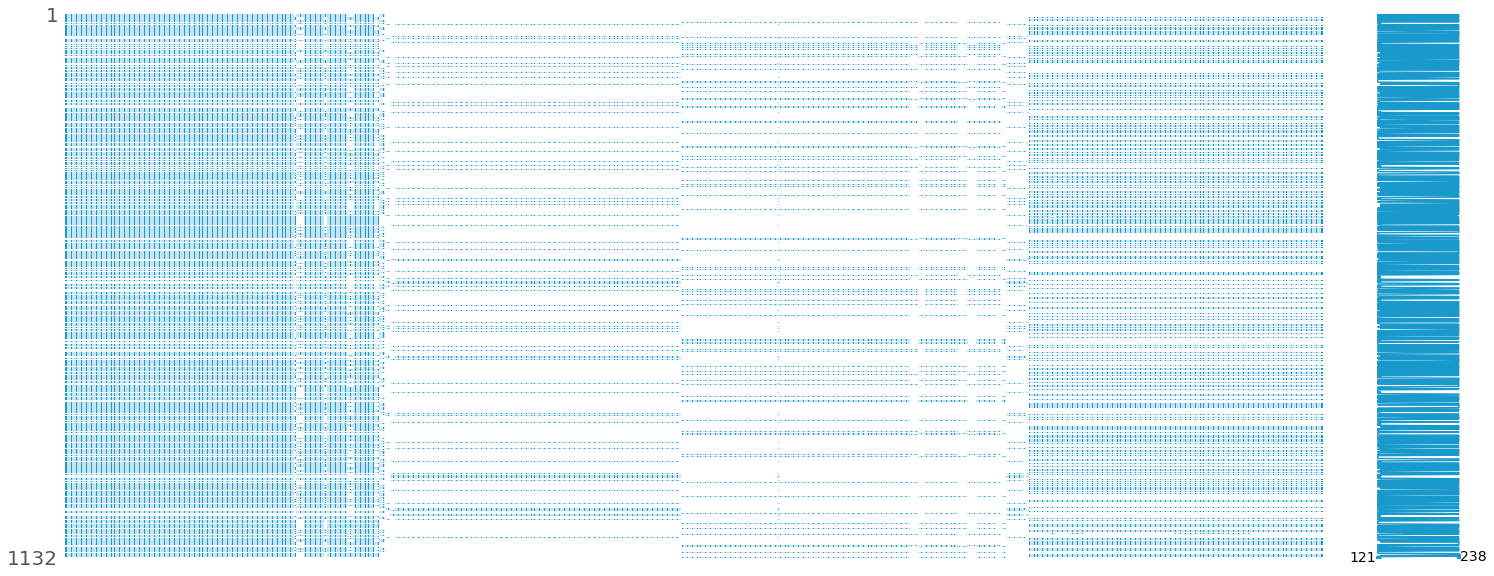

In [47]:
# Due to the size of the categorical data(3326), Visualizing the data in batches of 500
msno.matrix(num_data.iloc[:, :500], color=(0.1, 0.6, 0.8))

<AxesSubplot:>

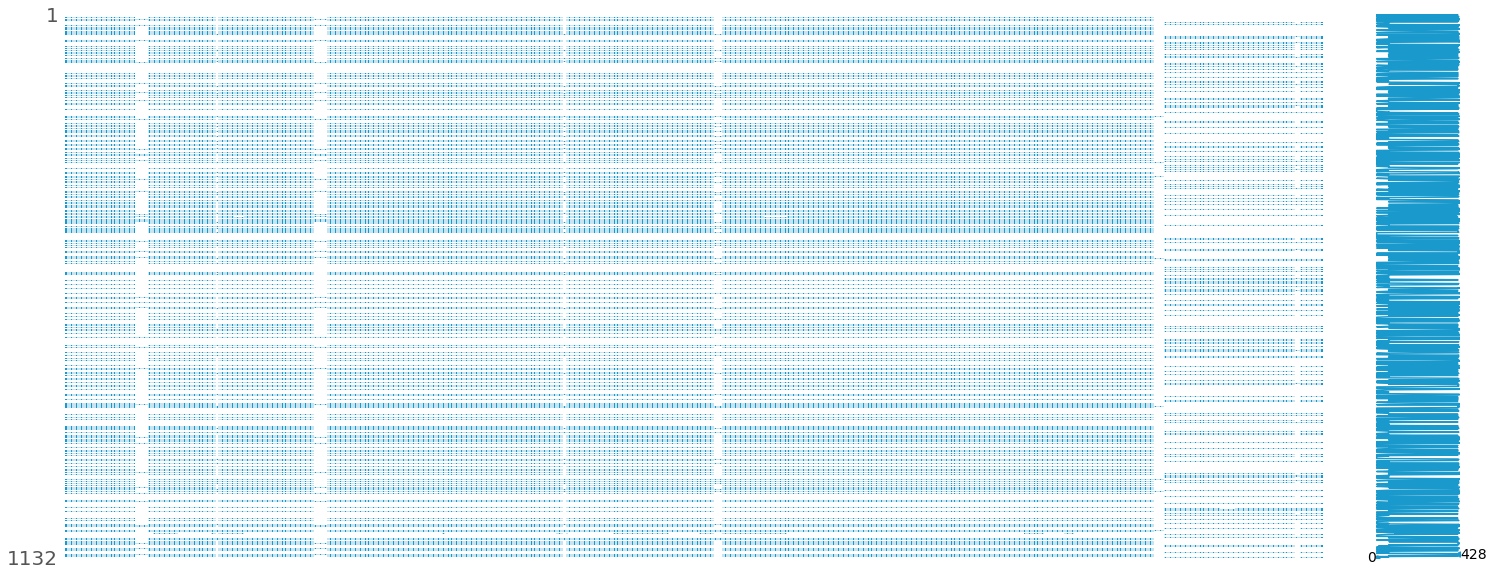

In [48]:
msno.matrix(num_data.iloc[:, 500:1000], color=(0.1, 0.6, 0.8))

# 3. Data Analysis based on LINE and PRODUCT_CODE

**T-31 & O-31**

T100306 & T100304  
(430, 400 / 4, 4)



----
**A-31**

T050304 & T010306 & T010305 & T050307  
(86, 76, 66, 66)

In [133]:
t_data = data[data['PRODUCT_CODE']=='T_31']
o_data = data[data['PRODUCT_CODE']=='O_31']
a_data = data[data['PRODUCT_CODE']=='A_31']

t_Xdata = t_data.iloc[:,4:]
o_Xdata = o_data.iloc[:,4:]
a_Xdata = a_data.iloc[:,4:]

t_Cdata = t_data.iloc[:,:4]
o_Cdata = o_data.iloc[:,:4]
a_Cdata = a_data.iloc[:,:4]

In [116]:
t_data.LINE.value_counts()

T100306    430
T100304    400
Name: LINE, dtype: int64

In [117]:
o_data.LINE.value_counts()

T100304    4
T100306    4
Name: LINE, dtype: int64

In [118]:
a_data.LINE.value_counts()

T050304    86
T010306    76
T010305    66
T050307    66
Name: LINE, dtype: int64

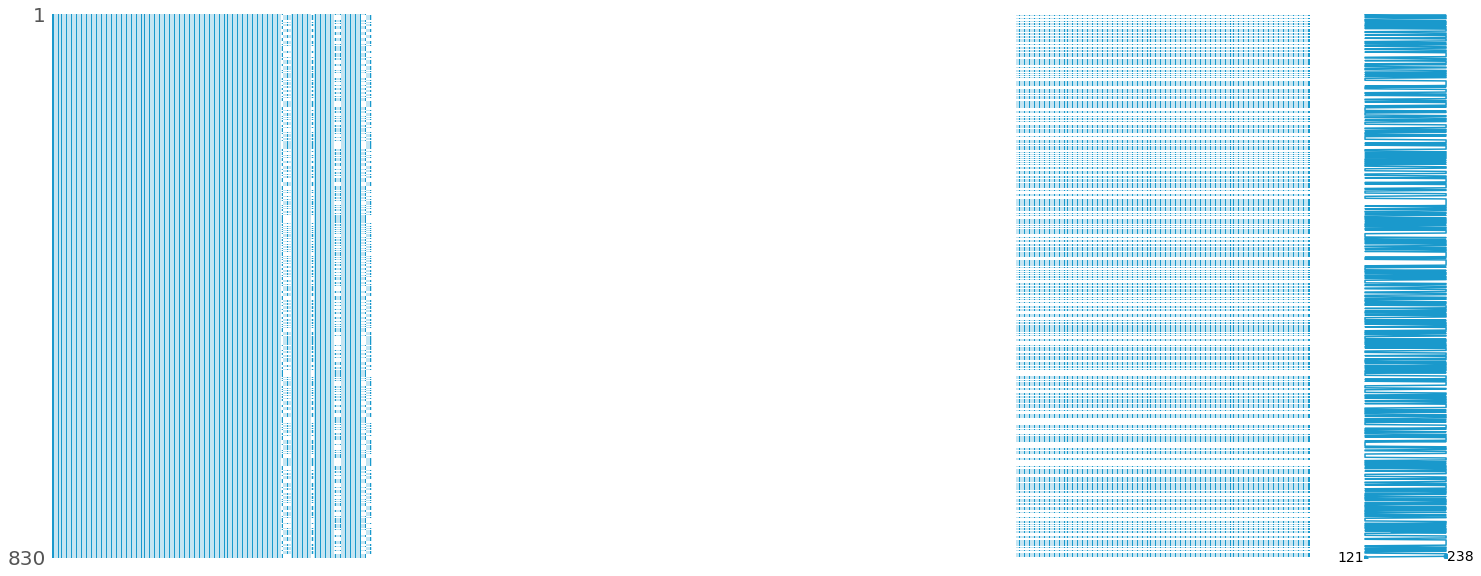

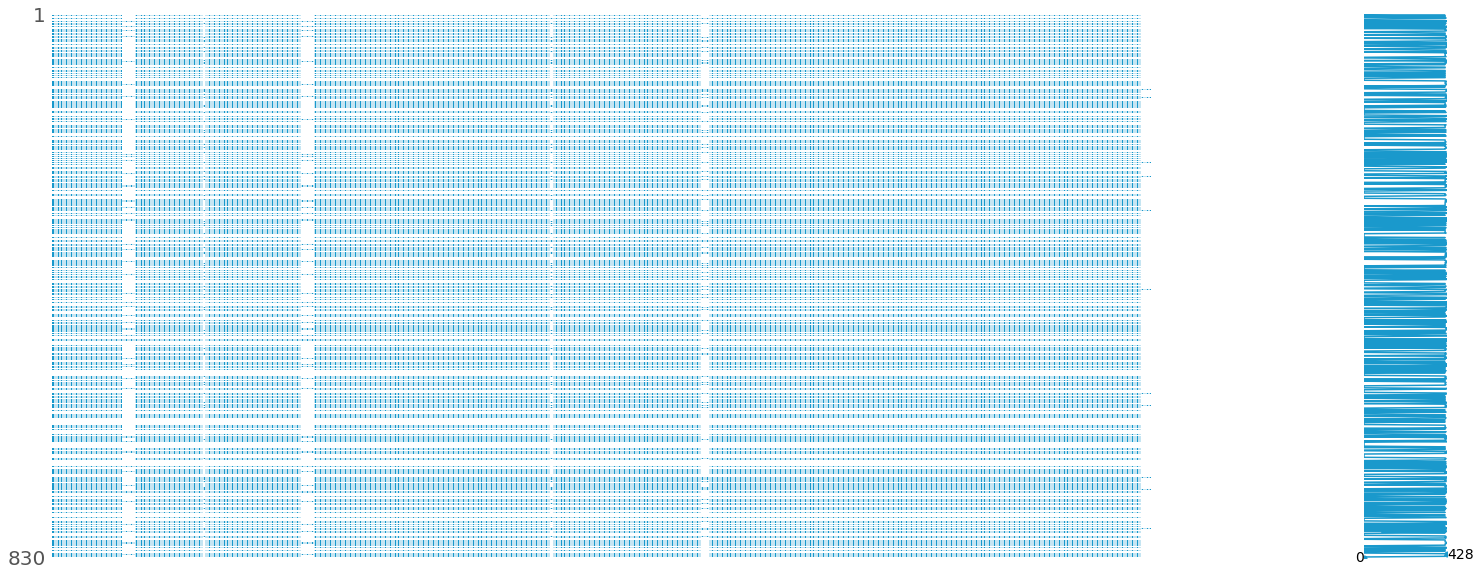

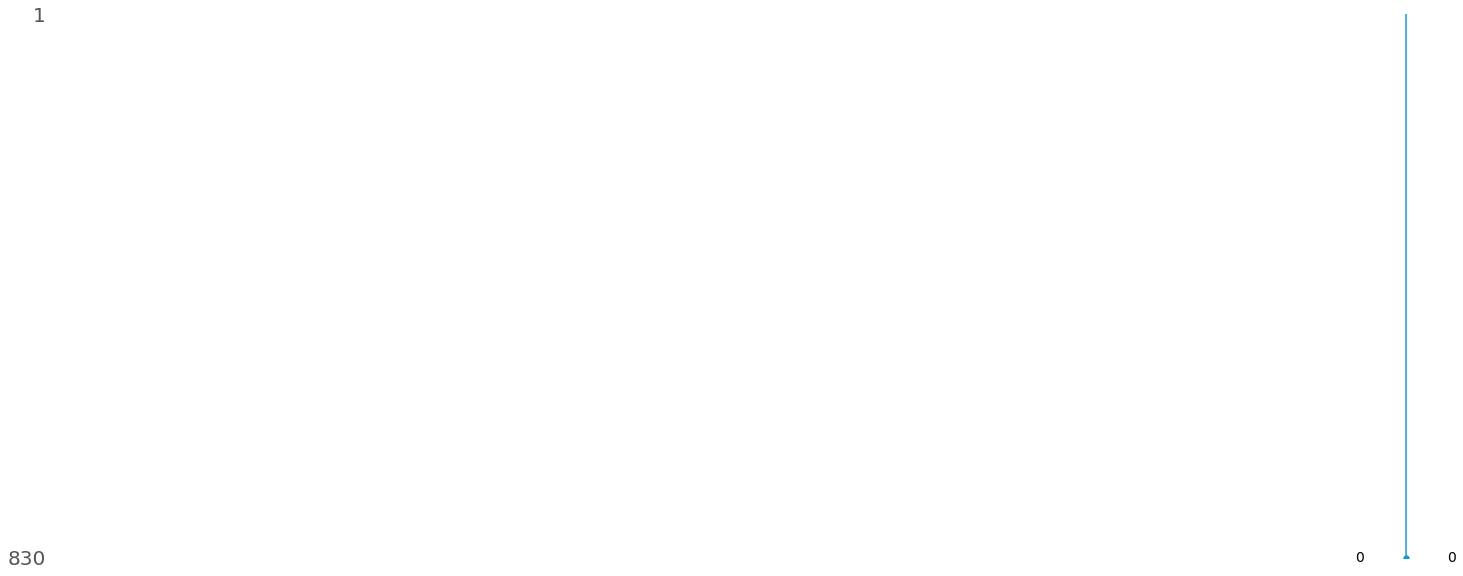

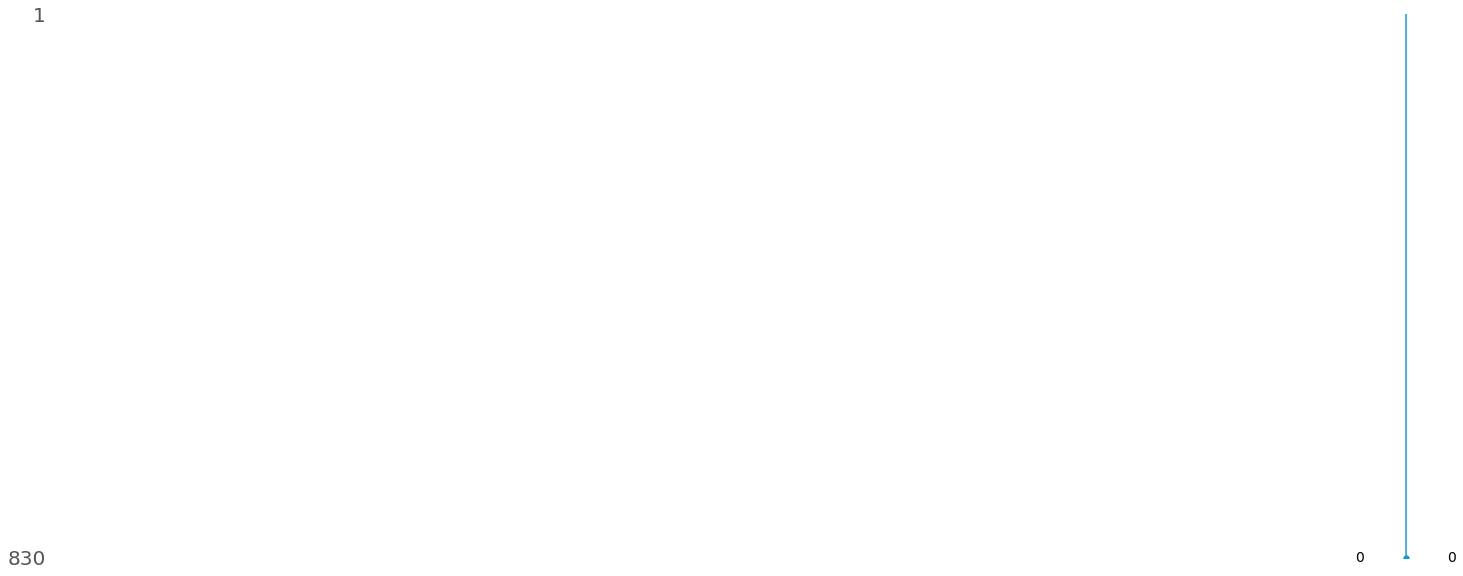

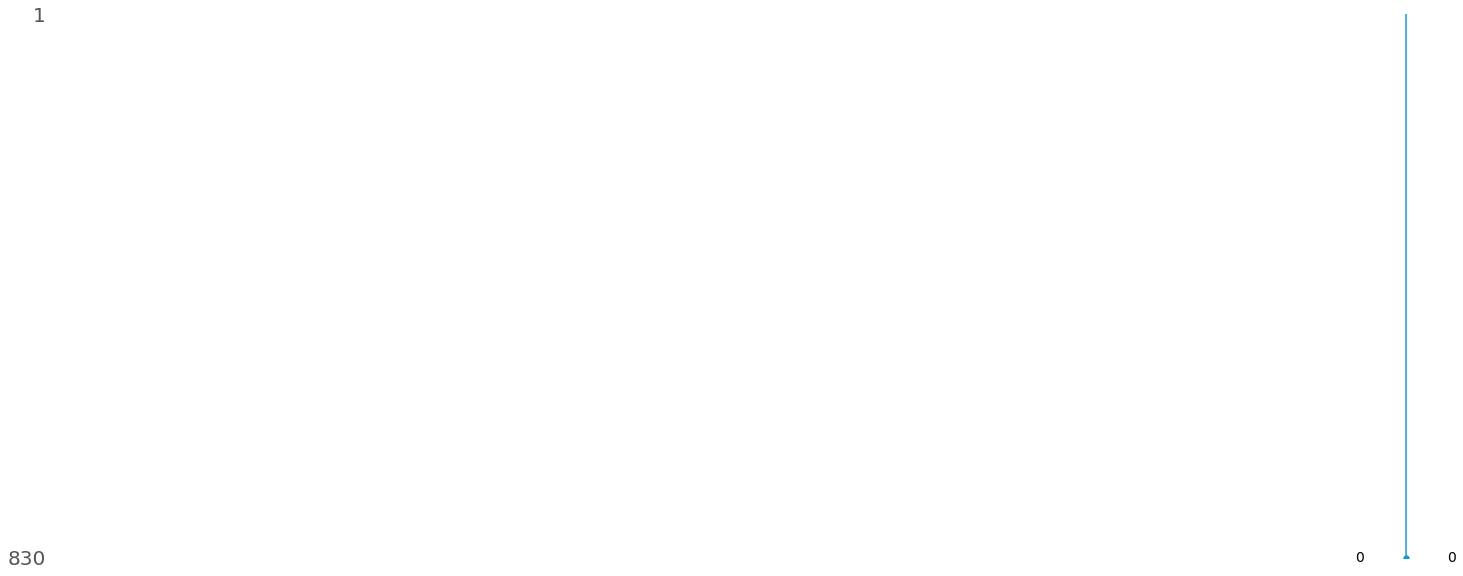

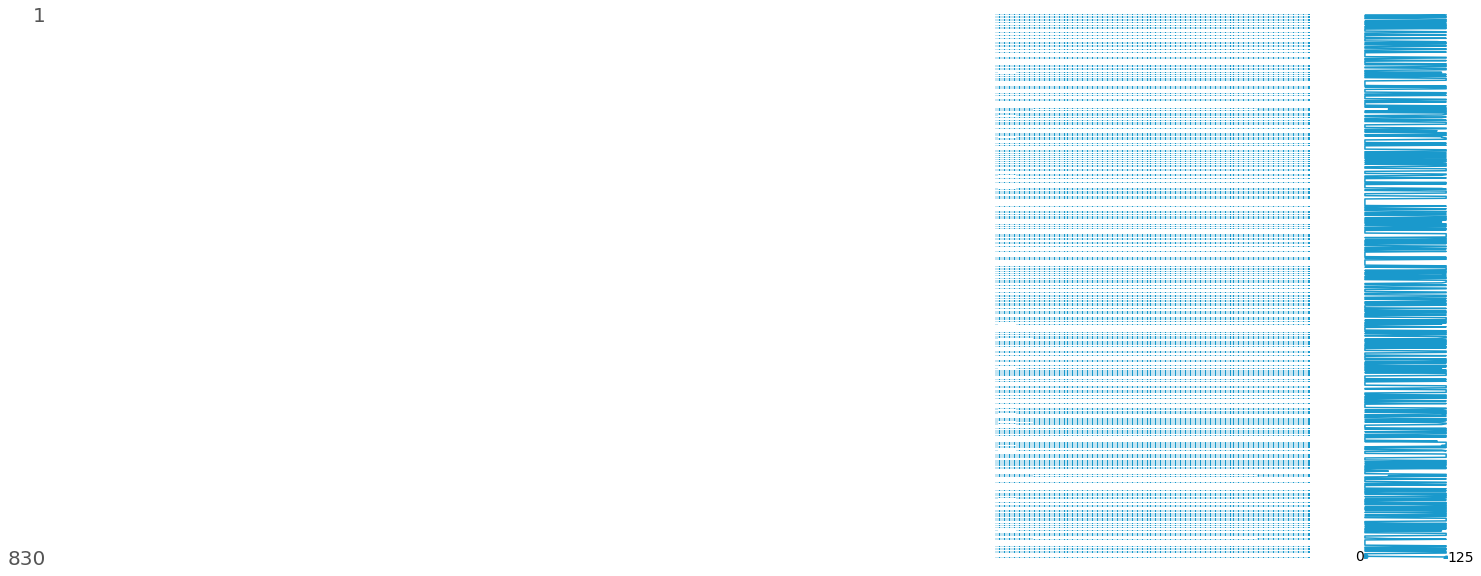

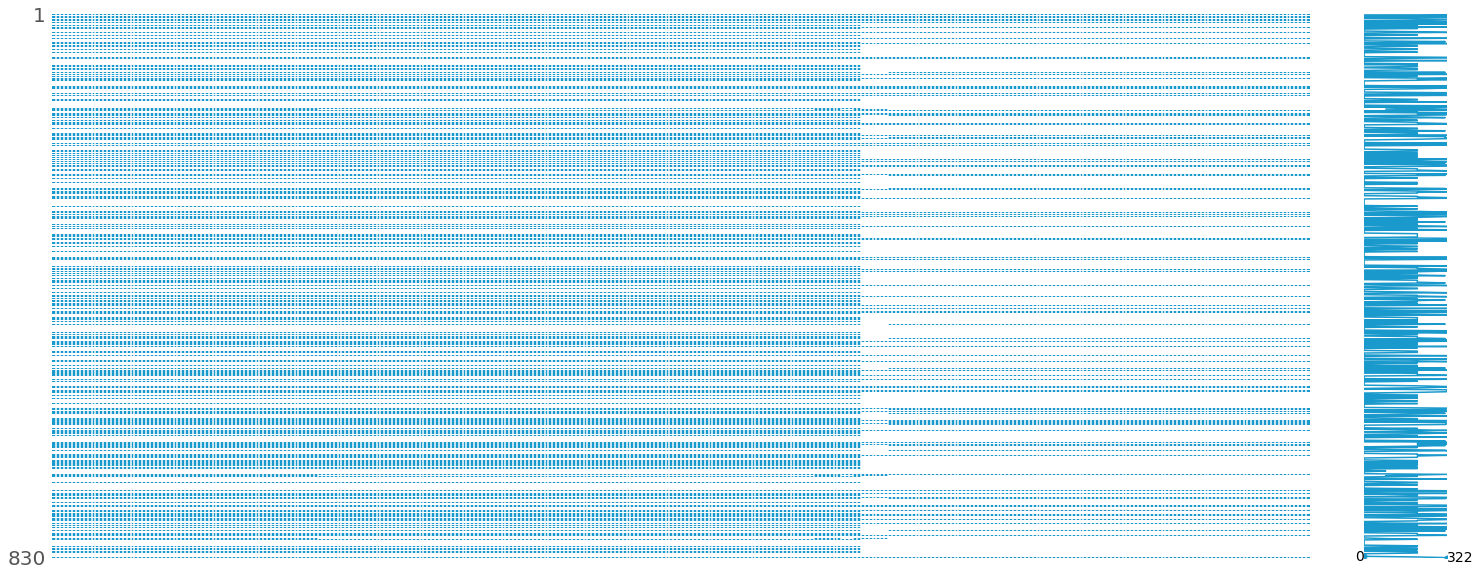

In [106]:
cols = [4, 504, 1004, 1504, 2004, 2504, 3004, 3326]
for i in range(0, len(cols)-1):
    p, q = cols[i], cols[i+1]    
    msno.matrix(t_data.iloc[:,p:q], color=(0.1, 0.6, 0.8))

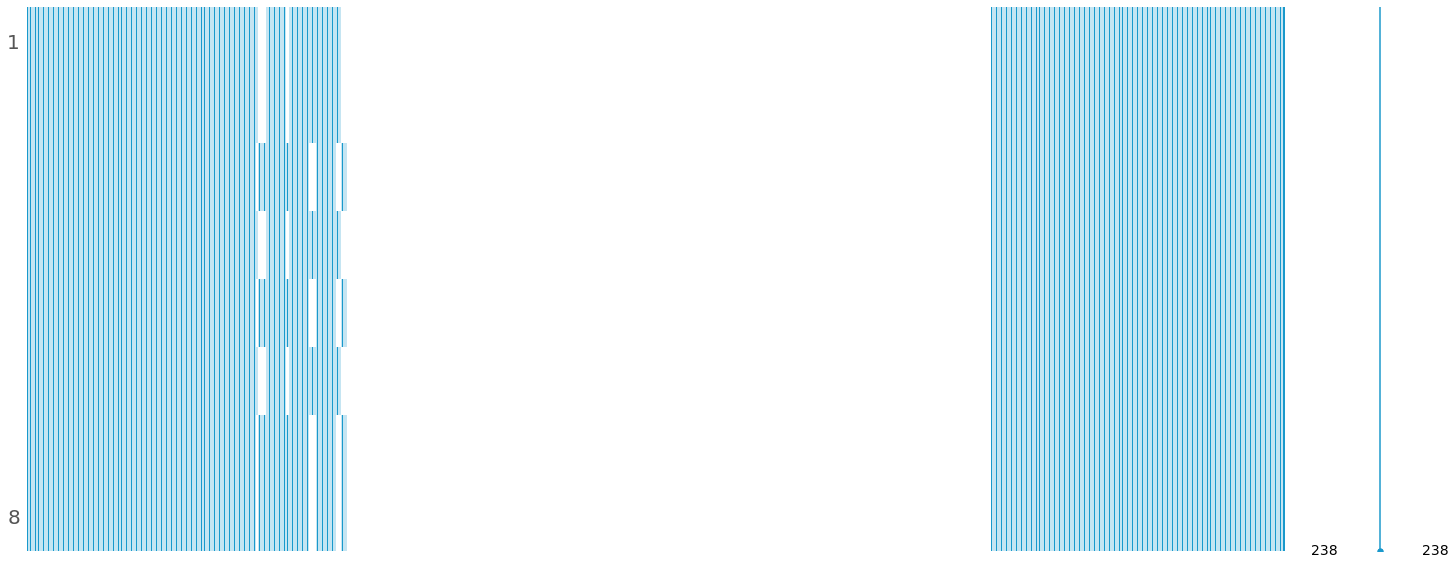

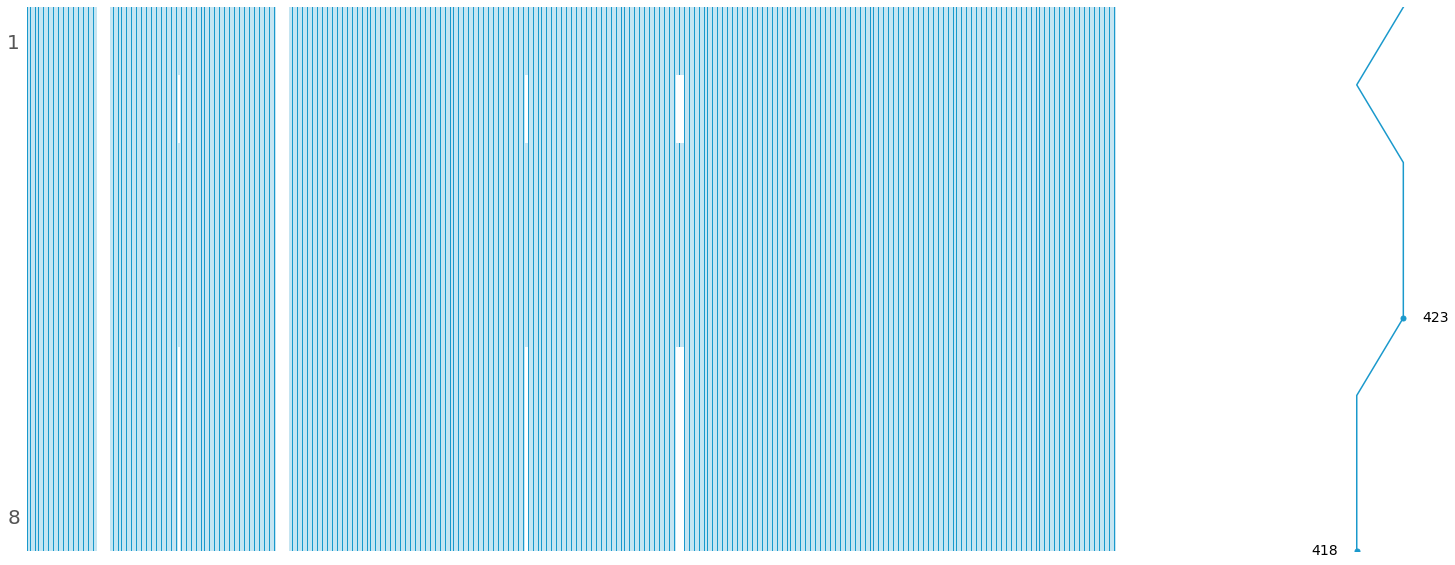

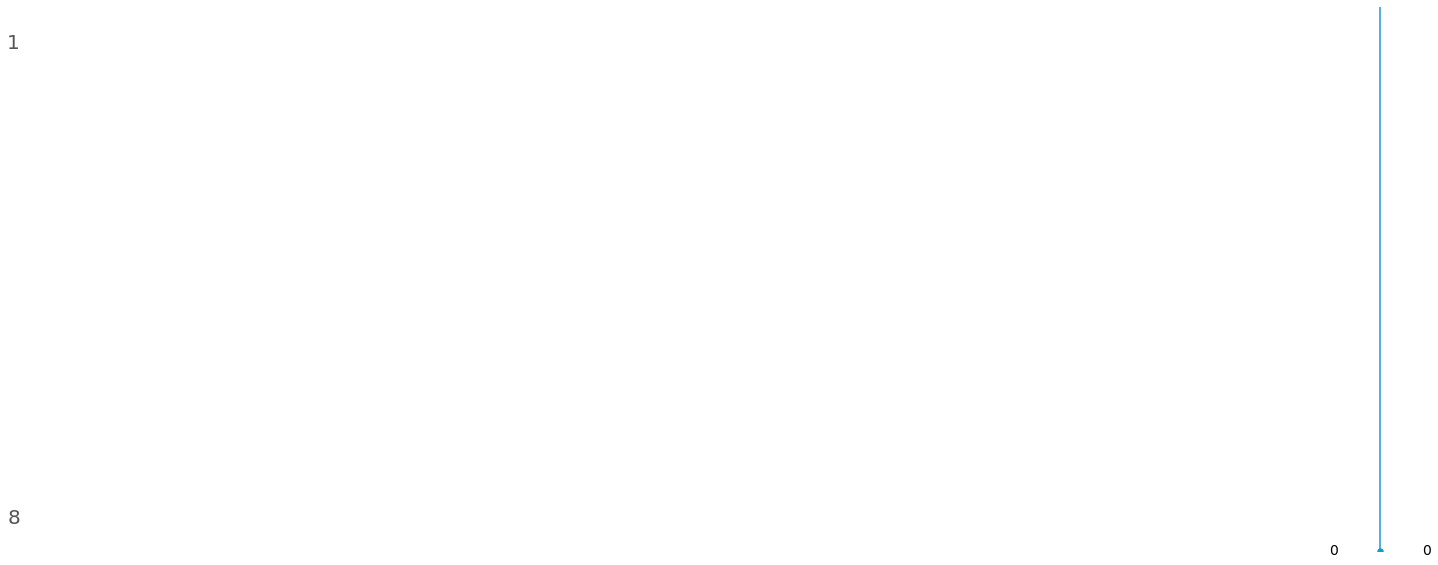

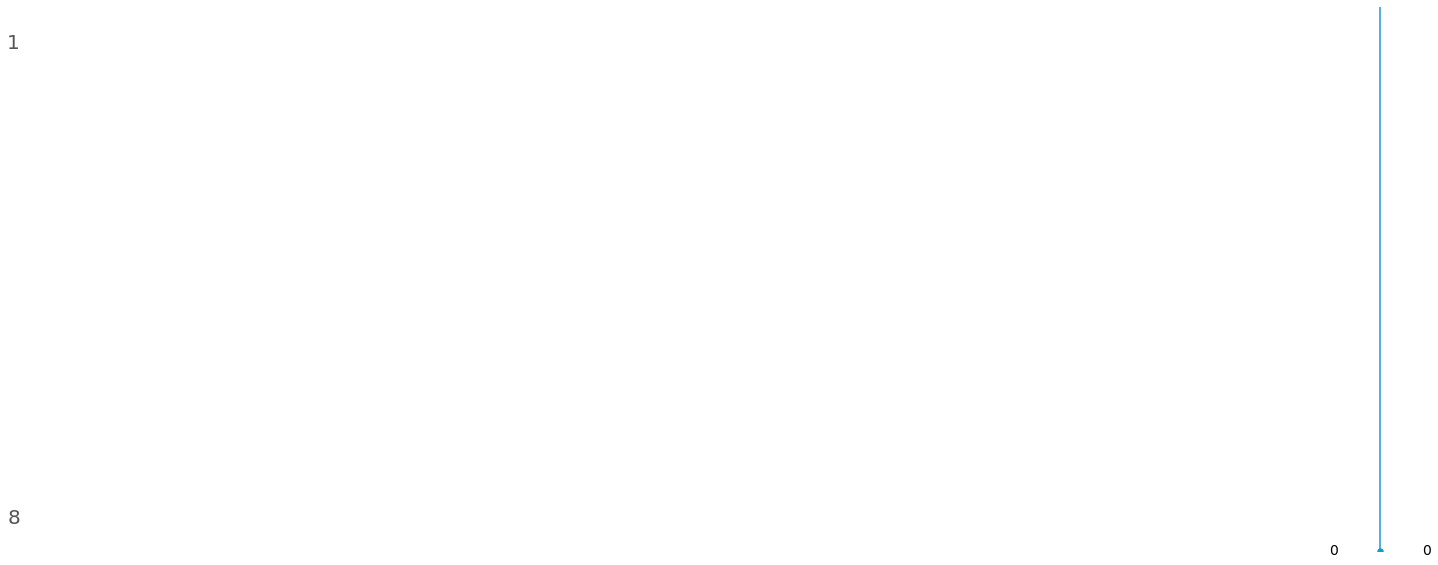

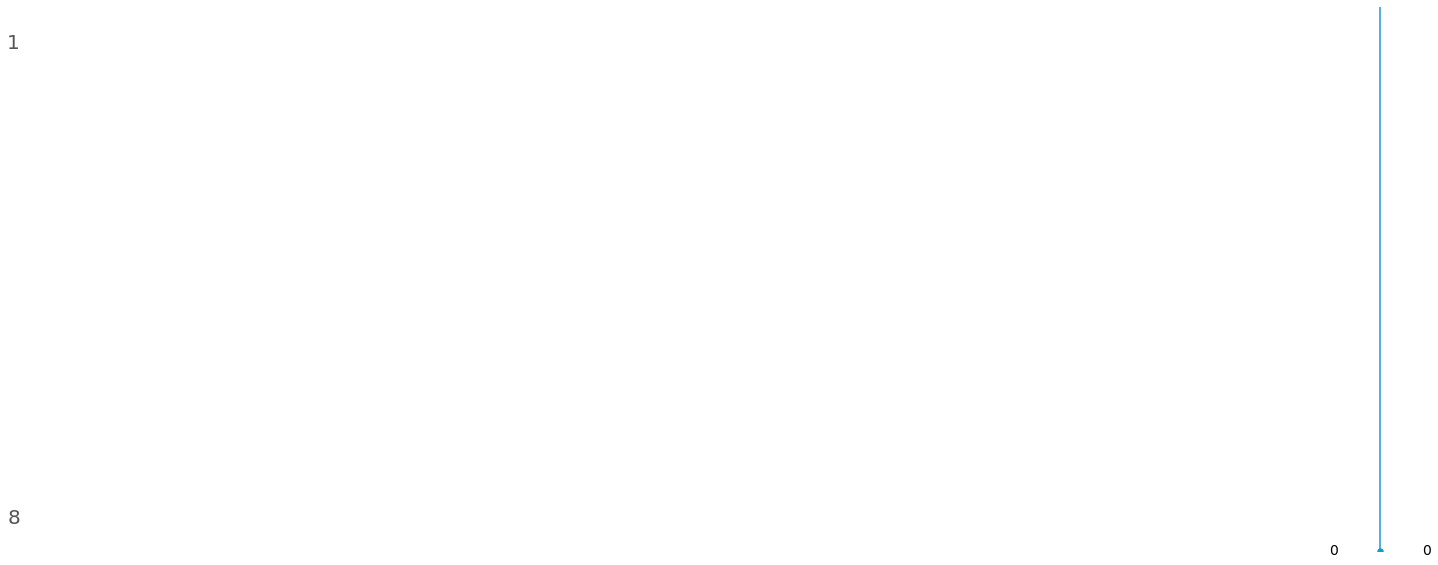

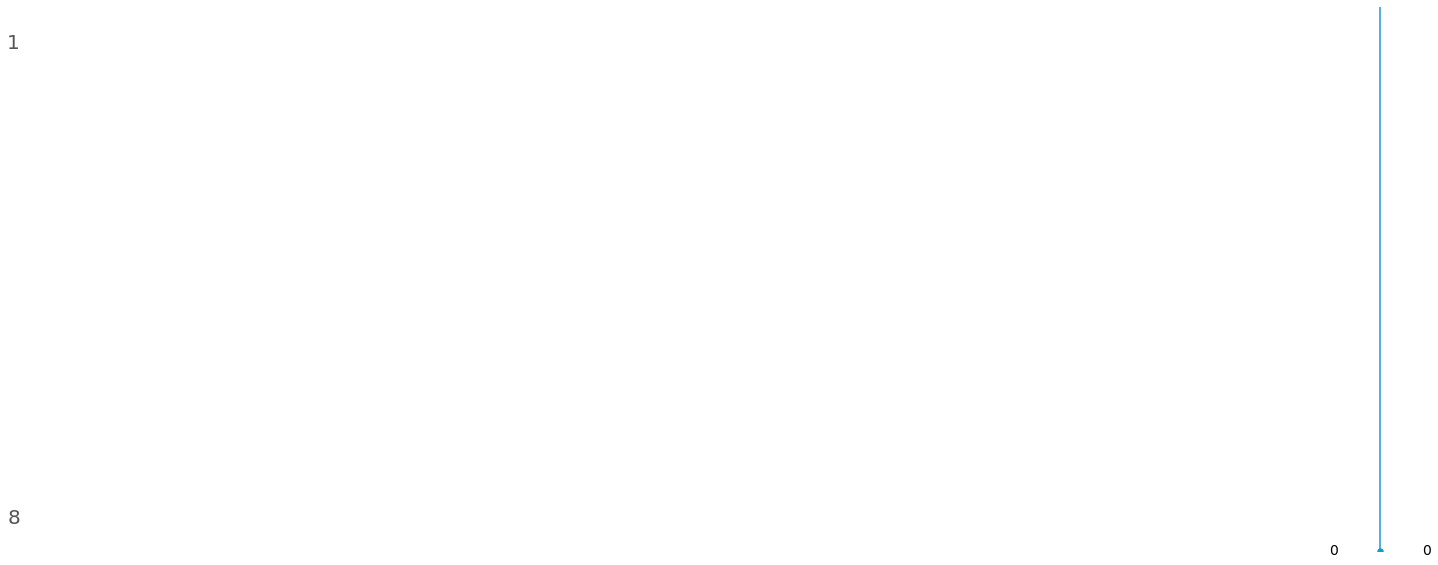

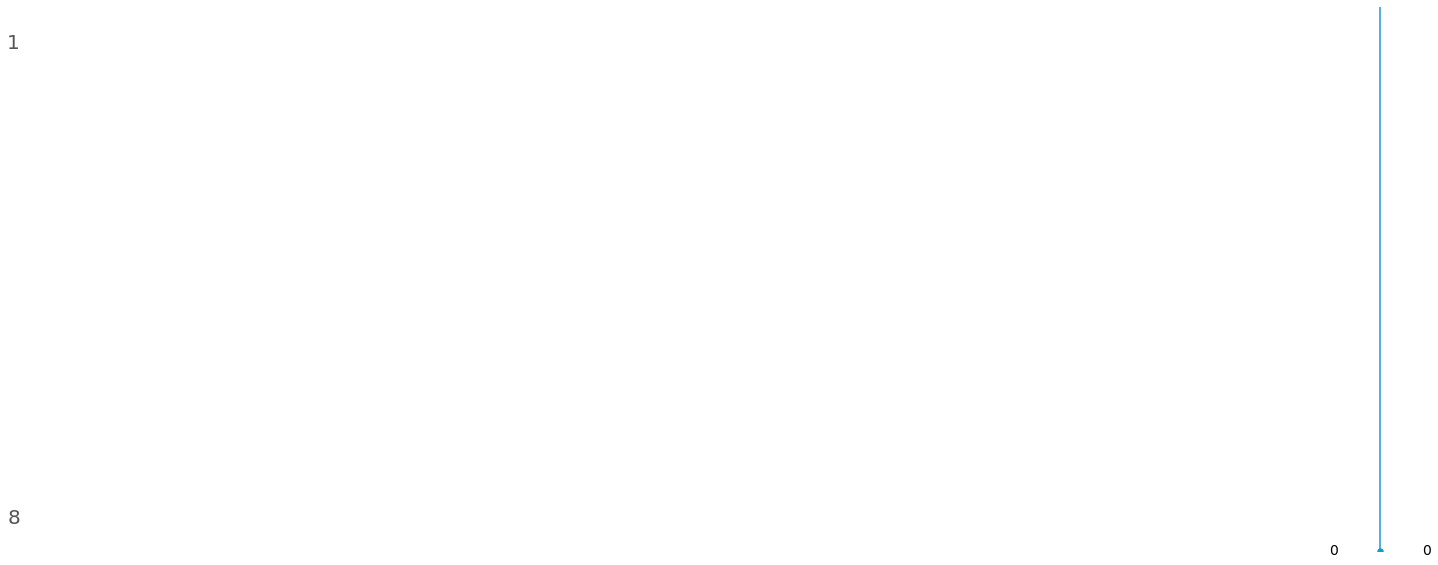

In [109]:
cols = [4, 504, 1004, 1504, 2004, 2504, 3004, 3326]
for i in range(0, len(cols)-1):
    p, q = cols[i], cols[i+1]    
    msno.matrix(o_data.iloc[:,p:q], color=(0.1, 0.6, 0.8))

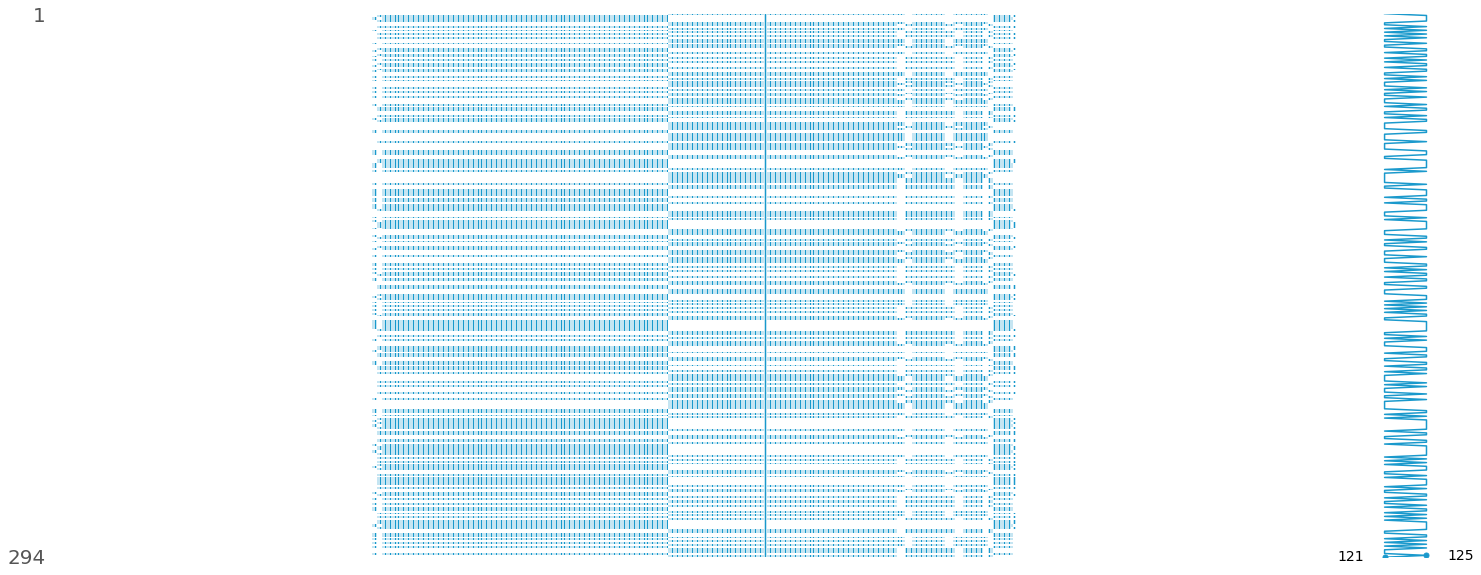

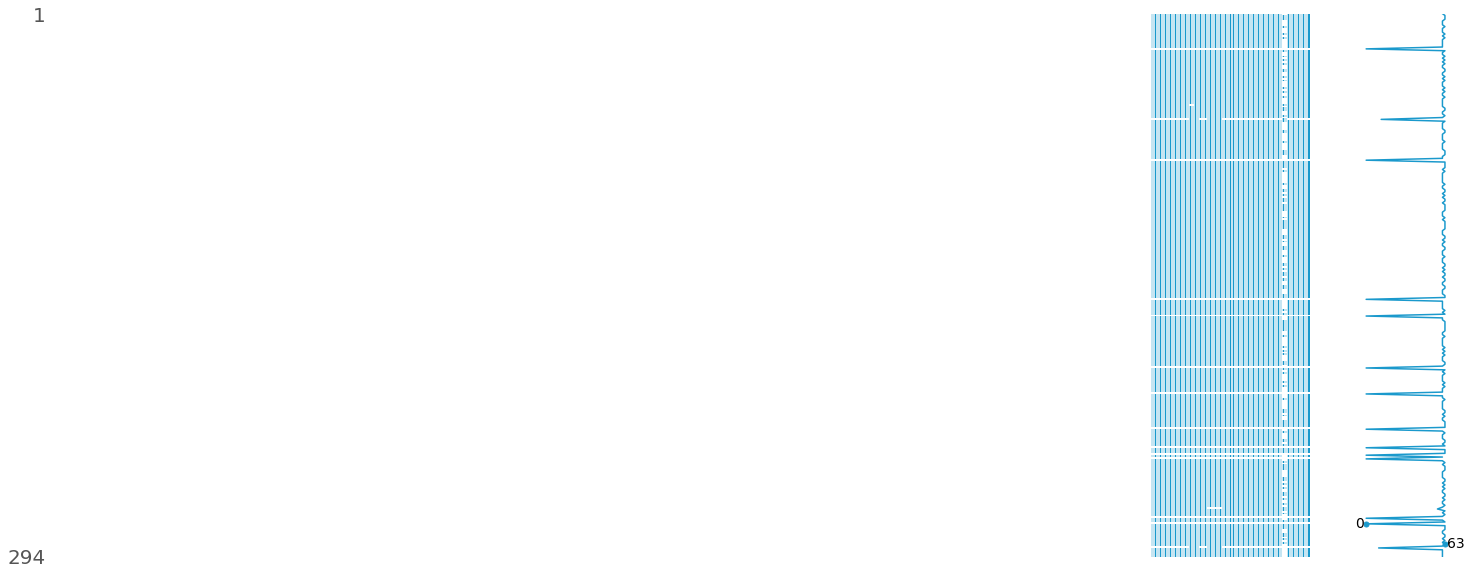

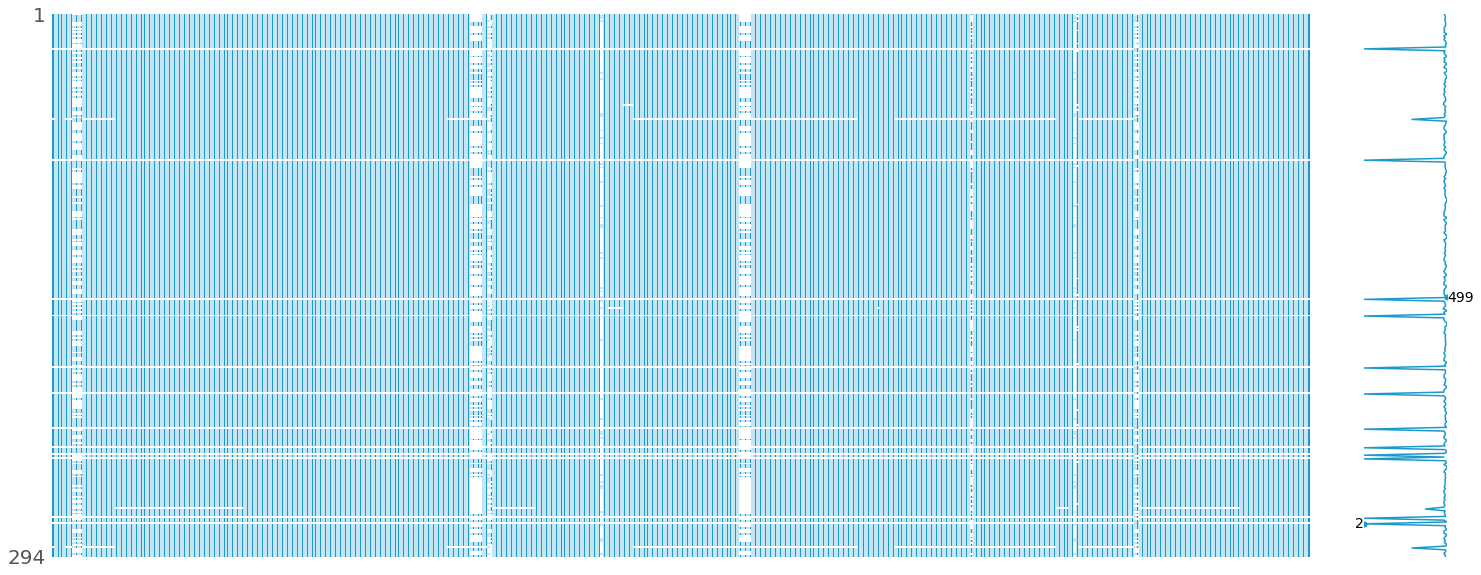

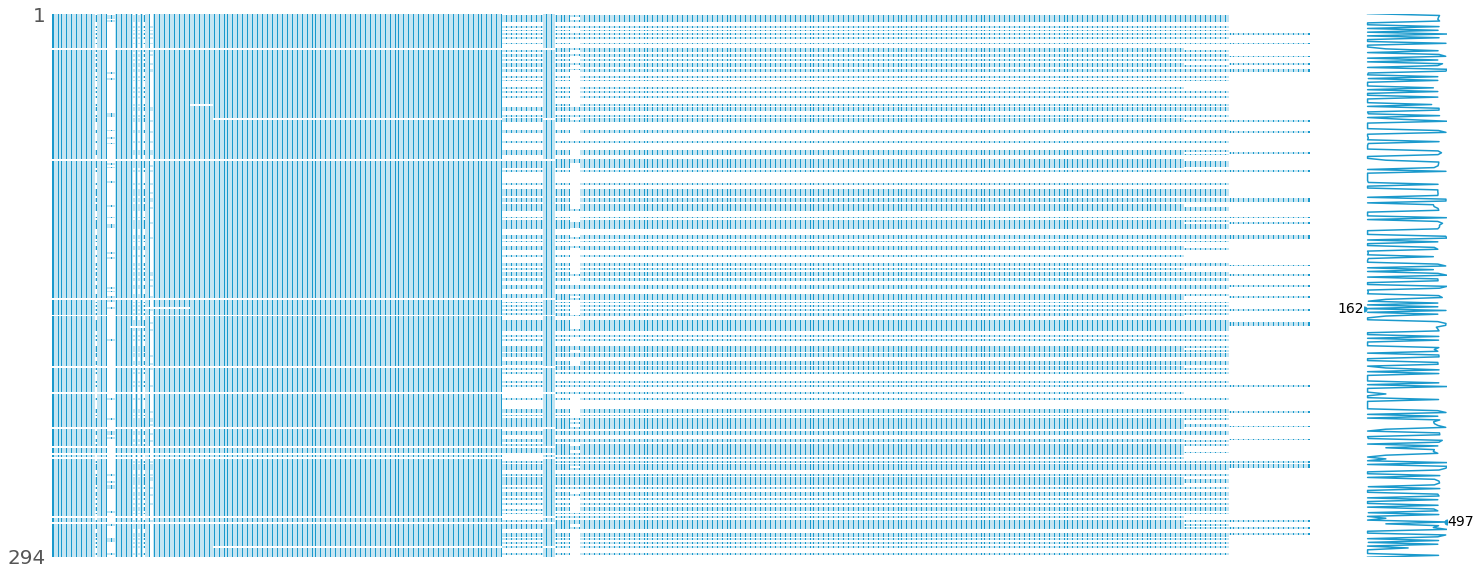

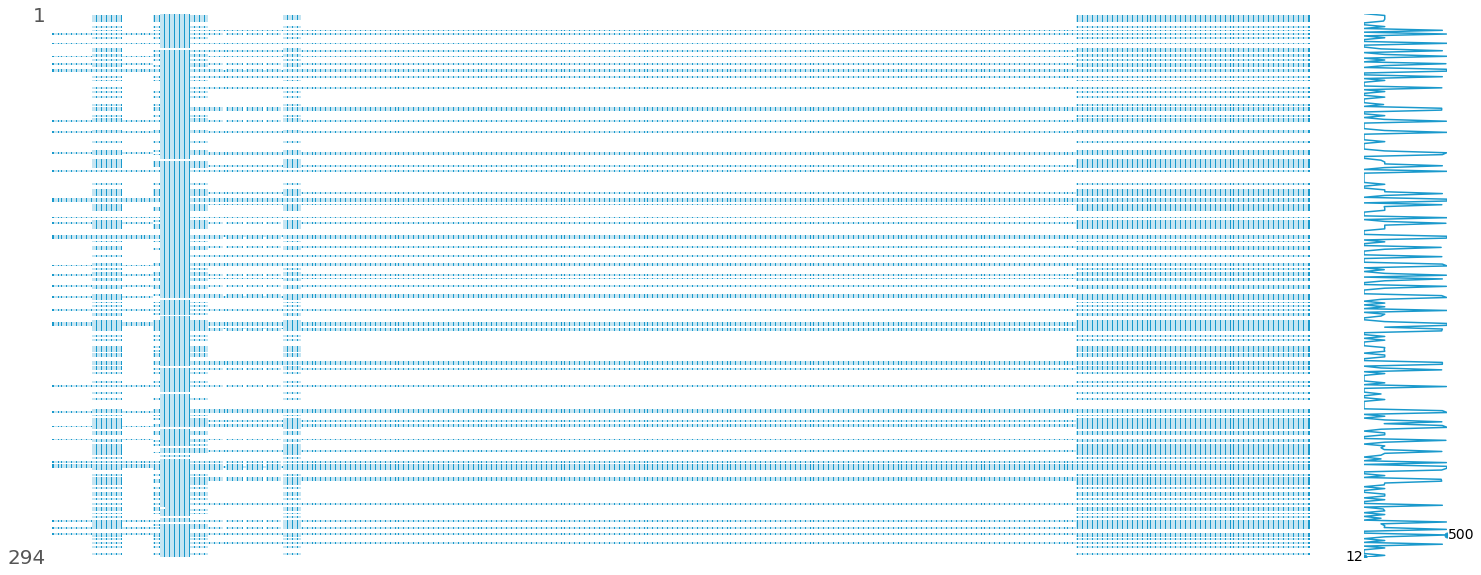

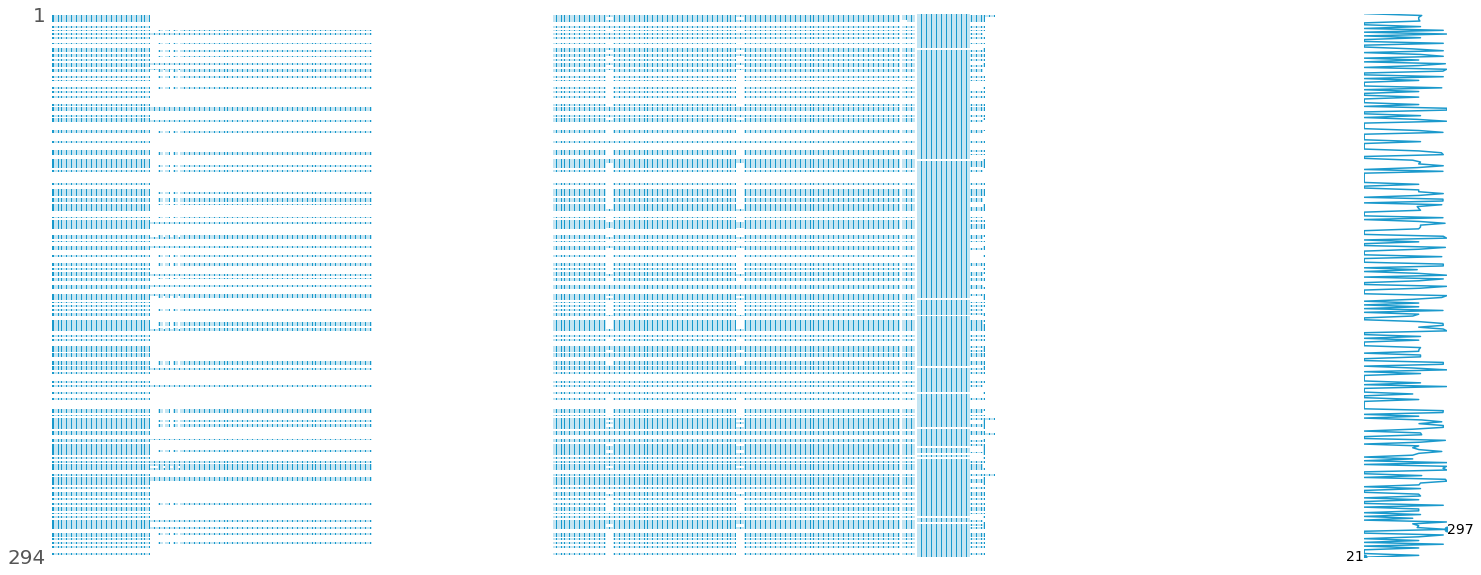

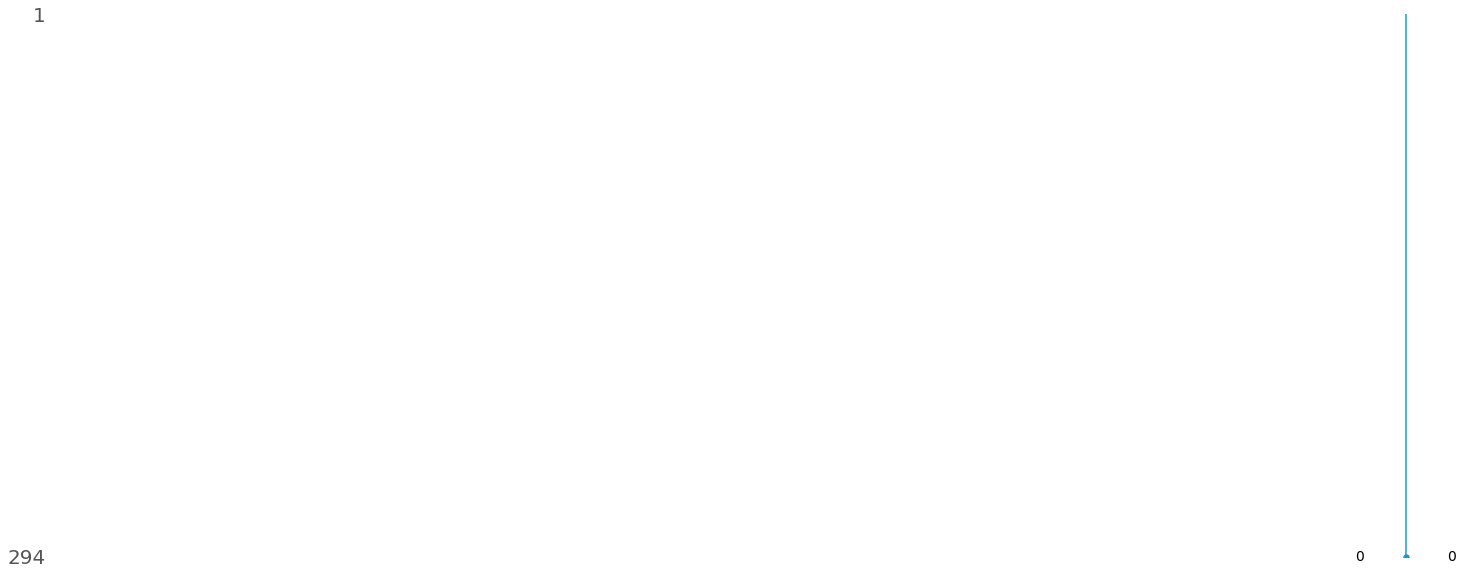

In [108]:
cols = [4, 504, 1004, 1504, 2004, 2504, 3004, 3326]
for i in range(0, len(cols)-1):
    p, q = cols[i], cols[i+1]    
    msno.matrix(a_data.iloc[:,p:q], color=(0.1, 0.6, 0.8))

### T & O

In [143]:
null_cols = t_Xdata.columns[t_Xdata.isna().sum()==830]
t_Xdata = t_Xdata.drop(null_cols, axis=1)
tData = pd.concat([t_Cdata, t_Xdata], axis=1)
tData

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_3317,X_3318,X_3319,X_3320,X_3321,X_3322,X_3323,X_3324,X_3325,X_3326
0,1,0.531957,T100304,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,0.000008,0.000003,0.191408,0.000008,0.001210,0.000021,0.000003,0.000002,0.189,0.000006
1,1,0.531105,T100306,T_31,2.0,96.0,0.0,45.0,10.0,0.0,...,0.000008,0.000003,0.188993,0.000032,0.000644,0.000041,0.000002,0.000003,0.185,0.000029
2,1,0.532292,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.528141,T100306,T_31,2.0,87.0,0.0,45.0,10.0,0.0,...,0.000007,0.000003,0.189424,0.000034,0.000678,0.000043,0.000004,0.000003,0.188,0.000031
4,1,0.532289,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2,0.537525,T100306,T_31,2.0,87.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,0,0.524576,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,1,0.530413,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,1,0.533311,T100306,T_31,1.0,88.0,0.0,45.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
null_cols = o_Xdata.columns[o_Xdata.isna().sum()==8]
o_Xdata = o_Xdata.drop(null_cols, axis=1)
oData = pd.concat([o_Cdata, o_Xdata], axis=1)
oData

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
92,1,0.531375,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,...,189.2,179.5,173.190323,168.6,321.0,303.036364,289.0,13.6,13.406667,13.2
232,1,0.525916,T100304,O_31,4.0,100.0,0.0,45.0,11.0,0.0,...,175.4,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2
368,1,0.533702,T100306,O_31,21.0,87.0,0.0,45.0,10.0,0.0,...,188.2,172.9,167.087097,161.1,326.0,304.818182,289.0,13.6,13.380000,13.2
375,1,0.529740,T100304,O_31,154.0,97.0,0.0,45.0,11.0,0.0,...,184.0,181.6,171.522581,163.3,326.0,305.890909,289.0,13.6,13.396667,13.2
605,1,0.532343,T100306,O_31,146.0,94.0,0.0,45.0,10.0,0.0,...,177.0,178.7,168.043333,161.9,327.0,309.745454,291.0,13.6,13.350000,13.2
736,1,0.530533,T100304,O_31,4.0,98.0,0.0,45.0,11.0,0.0,...,181.7,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3
898,2,0.535205,T100306,O_31,6.0,89.0,0.0,45.0,10.0,0.0,...,166.1,166.0,161.046667,151.3,326.0,312.537037,298.0,13.7,13.440000,13.2
1035,2,0.534951,T100306,O_31,6.0,90.0,0.0,45.0,10.0,0.0,...,176.0,161.9,157.464516,154.5,327.0,312.454545,298.0,13.7,13.454839,13.3


<AxesSubplot:>

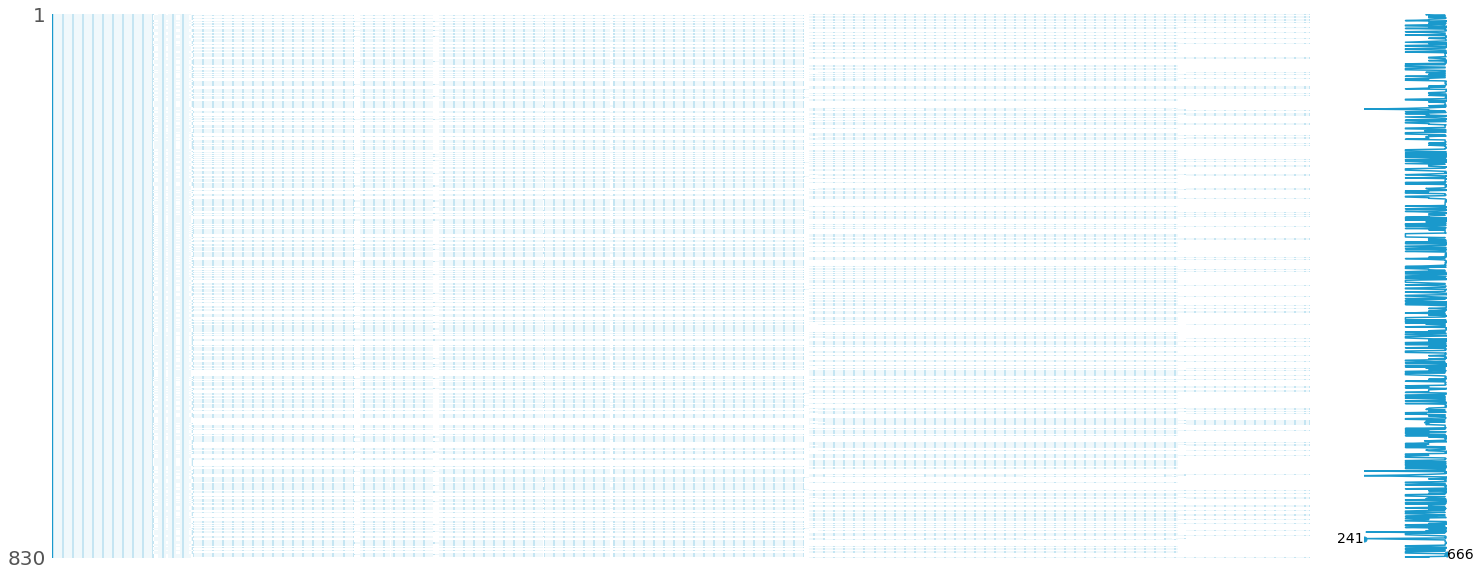

In [145]:
msno.matrix(tData.iloc[:,4:], color=(0.1, 0.6, 0.8))

<AxesSubplot:>

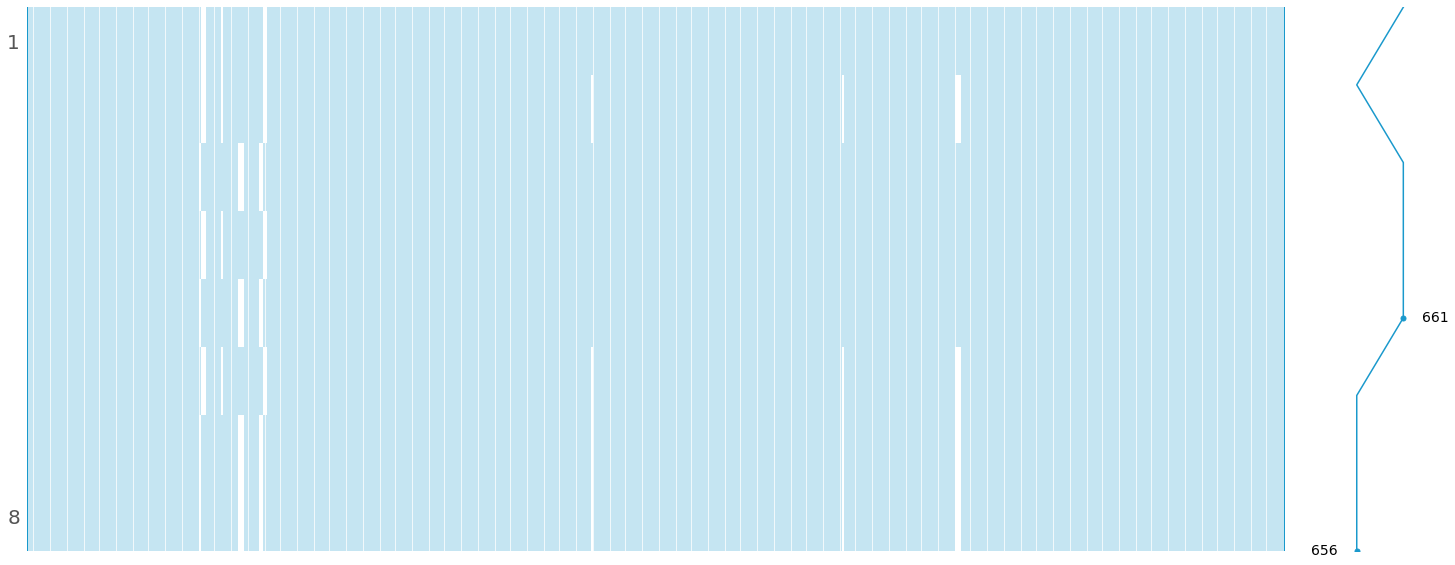

In [149]:
msno.matrix(oData.iloc[:,4:], color=(0.1, 0.6, 0.8))

### A

In [144]:
null_cols = a_Xdata.columns[a_Xdata.isna().sum()==294]
a_Xdata = a_Xdata.drop(null_cols, axis=1)
aData = pd.concat([a_Cdata, a_Xdata], axis=1)
aData

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
17,1,0.532754,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0,0.517402,T050307,A_31,NaN,NaN,20153.0,24984.0,0.21,0.22,...,53.55,52.68,49.97,56.66,63.52,1.0,210.5,214.6,201.6,191.9
21,0,0.522159,T050304,A_31,18031.0,18031.0,NaN,NaN,0.19,0.20,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
22,2,0.541429,T050304,A_31,8164.0,8164.0,NaN,NaN,0.19,0.20,...,56.38,57.10,51.49,56.08,64.40,1.0,NaN,NaN,NaN,NaN
27,1,0.526517,T050307,A_31,NaN,NaN,17014.0,21844.0,0.20,0.22,...,50.45,50.29,57.54,52.59,62.37,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,2,0.548592,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,1,0.526997,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,1,0.530940,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,0,0.516681,T050304,A_31,10729.0,10729.0,NaN,NaN,0.20,0.21,...,51.30,47.66,60.00,53.75,62.58,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

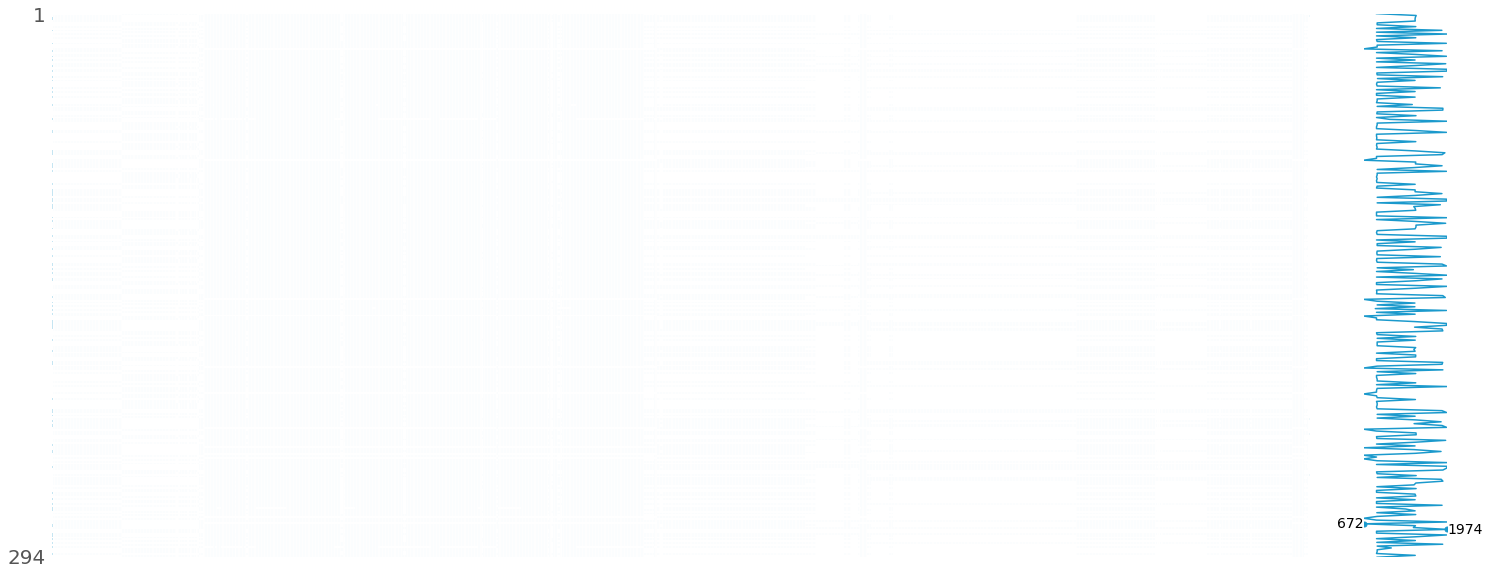

In [146]:
msno.matrix(aData.iloc[:,4:], color=(0.1, 0.6, 0.8))

In [165]:
aData.groupby('LINE').describe()

Y_Class                                               Y_Quality  \
          count      mean       std  min   25%  50%  75%  max     count   
LINE                                                                      
T010305    66.0  0.954545  0.642874  0.0  1.00  1.0  1.0  2.0      66.0   
T010306    76.0  1.236842  0.650506  0.0  1.00  1.0  2.0  2.0      76.0   
T050304    86.0  0.686047  0.690467  0.0  0.00  1.0  1.0  2.0      86.0   
T050307    66.0  1.272727  0.851161  0.0  0.25  2.0  2.0  2.0      66.0   

                   ... X_2874        X_2875                                    \
             mean  ...    75%    max  count     mean        std    min    25%   
LINE               ...                                                          
T010305  0.530474  ...    NaN    NaN    0.0      NaN        NaN    NaN    NaN   
T010306  0.533497  ...    NaN    NaN    0.0      NaN        NaN    NaN    NaN   
T050304  0.527164  ...    NaN    NaN    0.0      NaN        NaN    NaN    NaN   
T050307  0.534731  ...  268.4  271.4    4.0  216.675  25.204547  191.9  197.0   

                                 
            50%      75%    max  
LINE                             
T010305     NaN      NaN    NaN  
T010306     NaN      NaN    NaN  
T050304     NaN      NaN    NaN  
T050307  215.75  235.425  243.3  

[4 rows x 16976 columns]

<AxesSubplot:>

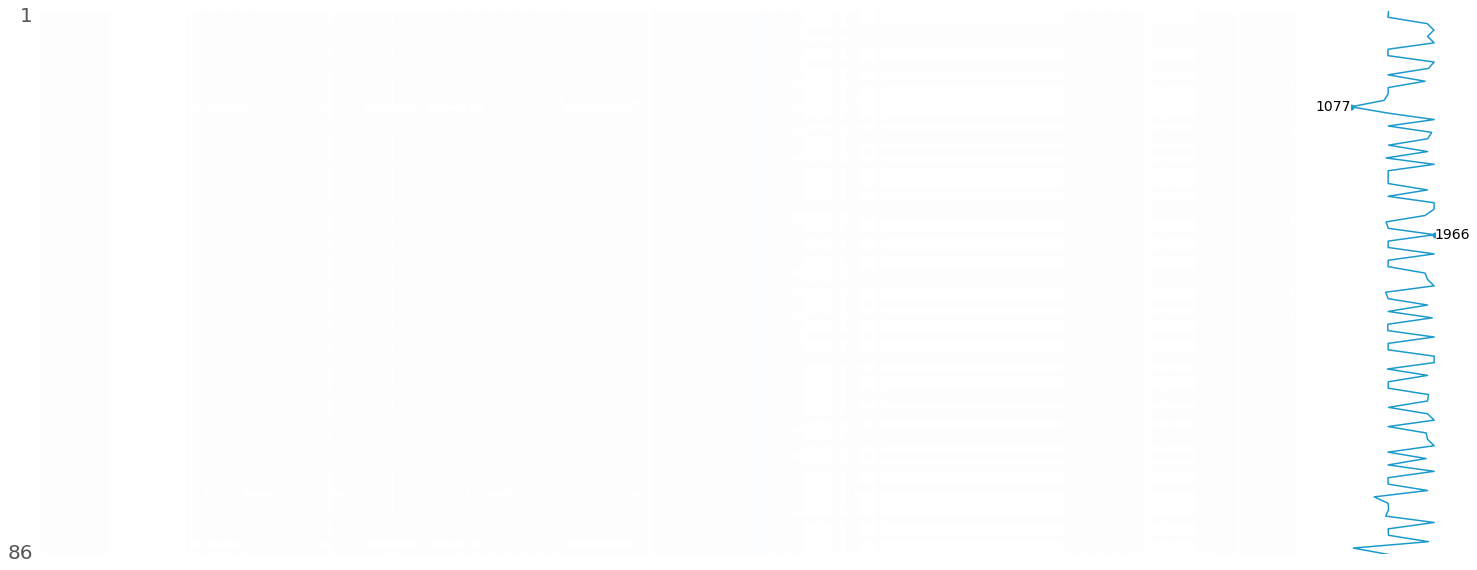

In [161]:
msno.matrix(temp.iloc[:,4:], color=(0.1, 0.6, 0.8))